In [5]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from sklearn.dummy import DummyClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
import shap
shap.initjs()

In [6]:
df = pd.read_csv("df.csv")

In [7]:
warnings.filterwarnings("ignore")

In [8]:
df

,Gender,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,Time,...,Geodesic_distance,Age_20 and less,Age_21 - 30,Age_31 -40,Age_41 - 50,Age_51 and more,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
0,0,0,0,0,0,4,3,750,1,60,...,7.157182,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,3,1,750,1,40,...,13.814558,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,3,1,250,1,35,...,6.063515,0,1,0,0,0,1,0,0,0
3,1,1,1,0,0,4,4,750,0,6,...,0.350000,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,3,2,750,0,46,...,15.334968,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,1,0,0,4,2,1250,0,18,...,7.410076,0,0,1,0,0,0,0,1,0
377,1,1,0,0,0,1,0,750,1,60,...,8.835484,0,0,0,1,0,0,1,0,0
378,0,1,0,1,1,3,1,750,2,44,...,2.680253,0,1,0,0,0,1,0,0,0
379,1,0,0,0,0,3,0,750,1,18,...,1.869763,0,1,0,0,0,0,0,1,0


In [9]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Gender', 'Driver_licence', 'Motor_licence', 'Bike', 'Skate', 'Hsize',
       'Vehicles', 'Income', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 and less', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 and more', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

We will run Variance Inflator frequency to reduce multicollinearity

In [7]:
drops = ['Mode','Gender', 'Driver_licence', 'Motor_licence', 'Bike', 'Skate', 'Hsize',
       'Vehicles', 'Mode', 'Safety',
       'Environment', 'Parking',
       'Geodesic_distance', 'Age_20 and less', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 and more', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']
X = df.drop(drops, axis=1)
y= df["Mode"]

In [8]:
X

,Income,Time,Convenience,Cost,Health,Weather,Distance
0,750,60,1,3,5,3,8.00
1,750,40,4,4,2,2,7.60
2,250,35,4,5,1,4,6.60
3,750,6,5,3,3,5,0.35
4,750,46,5,5,3,5,19.60
...,...,...,...,...,...,...,...
376,1250,18,5,3,3,3,8.60
377,750,60,3,5,3,3,9.70
378,750,44,4,3,5,5,3.20
379,750,18,4,5,3,3,2.20


In [9]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

      Variable        VIF
0        const  43.060609
1       Income   1.215773
2         Time   1.431254
3  Convenience   1.228369
4         Cost   1.066950
5       Health   1.254286
6      Weather   1.266047
7     Distance   1.395881


In [10]:
drops = ['Mode','Gender', 'Driver_licence', 'Motor_licence', 'Bike', 'Skate', 'Hsize',
       'Vehicles', 'Mode', 'Safety',   'Environment', 'Parking',
       'Geodesic_distance', 'Age_20 and less', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 and more', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']
X = df.drop(drops, axis=1)
y= df["Mode"]

In [11]:
X.columns

Index(['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance'],
      dtype='object')

In [12]:
X

,Income,Time,Convenience,Cost,Health,Weather,Distance
0,750,60,1,3,5,3,8.00
1,750,40,4,4,2,2,7.60
2,250,35,4,5,1,4,6.60
3,750,6,5,3,3,5,0.35
4,750,46,5,5,3,5,19.60
...,...,...,...,...,...,...,...
376,1250,18,5,3,3,3,8.60
377,750,60,3,5,3,3,9.70
378,750,44,4,3,5,5,3.20
379,750,18,4,5,3,3,2.20


In [13]:
X, y = shuffle(X, y, random_state=123)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [15]:
X_train.columns

Index(['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance'],
      dtype='object')

In [16]:
X_test.columns

Index(['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance'],
      dtype='object')

In [17]:
features = ['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance']

In [18]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    83
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    55
2    49
1    49
Name: count, dtype: int64


In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((228, 7), (228,), (153, 7), (153,))

In [17]:
columns = X_train.columns

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [37]:
model = Sequential()
model.add(Dense(units=40, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.1)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Epoch 1/20
205/205 [==============================] - 1s 2ms/step - loss: 1.0547 - accuracy: 0.5610 - val_loss: 0.9971 - val_accuracy: 0.7391
Epoch 2/20
205/205 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.7171 - val_loss: 0.8587 - val_accuracy: 0.7826
Epoch 3/20
205/205 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.8098 - val_loss: 0.6579 - val_accuracy: 0.8261
Epoch 4/20
205/205 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.8390 - val_loss: 0.5465 - val_accuracy: 0.7826
Epoch 5/20
205/205 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8439 - val_loss: 0.4558 - val_accuracy: 0.8696
Epoch 6/20
205/205 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8732 - val_loss: 0.4518 - val_accuracy: 0.8261
Epoch 7/20
205/205 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8829 - val_loss: 0.3993 - val_accuracy: 0.8261
Epoch 

# Dummy classifier

In [84]:
dummy_classifier = DummyClassifier(strategy="uniform")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.37        55
           1       0.23      0.22      0.23        49
           2       0.29      0.31      0.30        49

    accuracy                           0.30       153
   macro avg       0.30      0.30      0.30       153
weighted avg       0.30      0.30      0.30       153



In [85]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.31      0.29        55
           1       0.45      0.41      0.43        49
           2       0.34      0.33      0.33        49

    accuracy                           0.35       153
   macro avg       0.36      0.35      0.35       153
weighted avg       0.35      0.35      0.35       153



In [86]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.36
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        55
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        49

    accuracy                           0.36       153
   macro avg       0.12      0.33      0.18       153
weighted avg       0.13      0.36      0.19       153



# Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(random_state=21)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

7

In [25]:
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [26]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.83      0.80      0.81        49
           2       0.77      0.82      0.79        49

    accuracy                           0.80       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.81      0.80      0.80       153



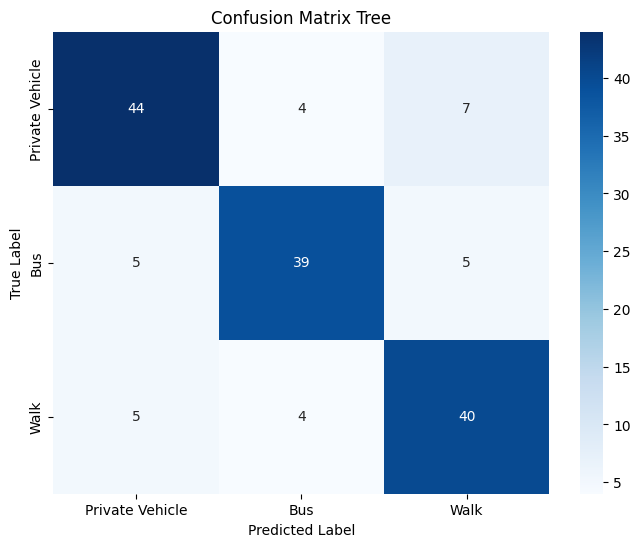

In [27]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [141]:
param_grid = {
    'max_depth': list(range(2, 8))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=21),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

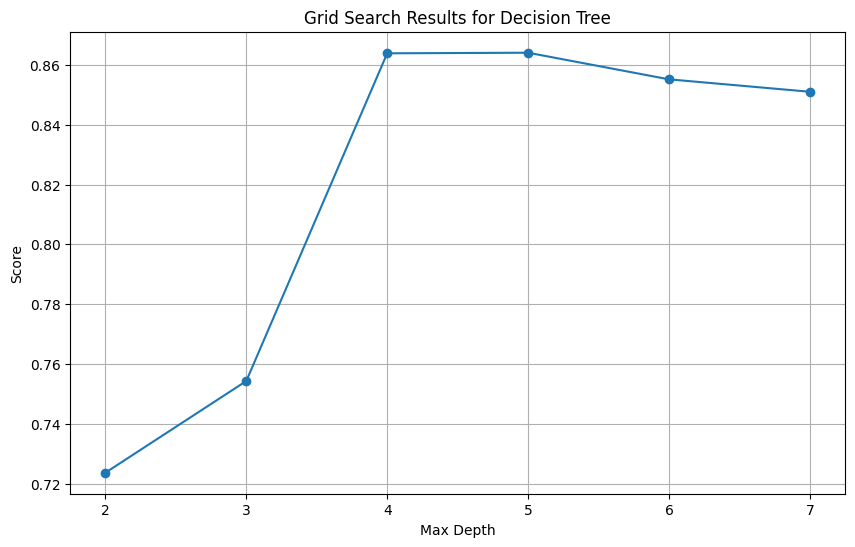

In [142]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [145]:
dt_model = DecisionTreeClassifier(random_state=21, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        83
           1       1.00      0.92      0.96        73
           2       0.97      0.99      0.98        72

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



In [146]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        55
           1       0.91      0.80      0.85        49
           2       0.78      0.88      0.83        49

    accuracy                           0.82       153
   macro avg       0.83      0.82      0.82       153
weighted avg       0.83      0.82      0.82       153



In [28]:
dt_model = DecisionTreeClassifier(random_state=21)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [294]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [295]:
tree=grid_search_dt.best_estimator_
y_pred_log = tree.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Tree_Report:', Log_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       0.97      0.97      0.97        73
           2       1.00      0.97      0.99        72

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [296]:
score=grid_search_dt.best_score_
score

0.8683794466403162

In [297]:
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.91      0.82      0.86        49
           2       0.78      0.82      0.80        49

    accuracy                           0.83       153
   macro avg       0.83      0.83      0.83       153
weighted avg       0.83      0.83      0.83       153



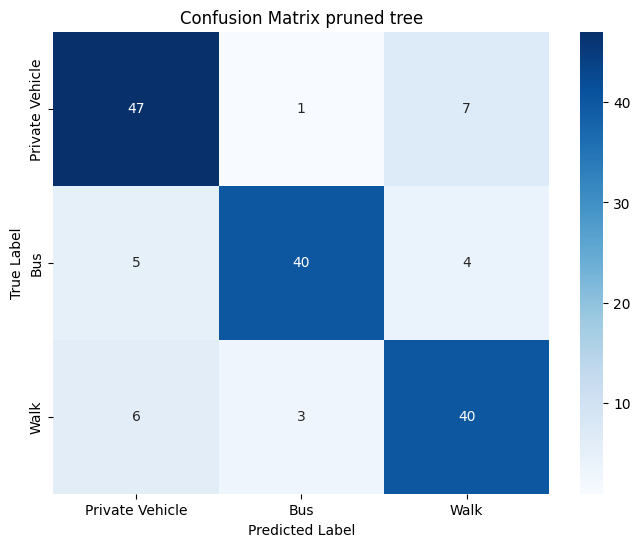

In [298]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

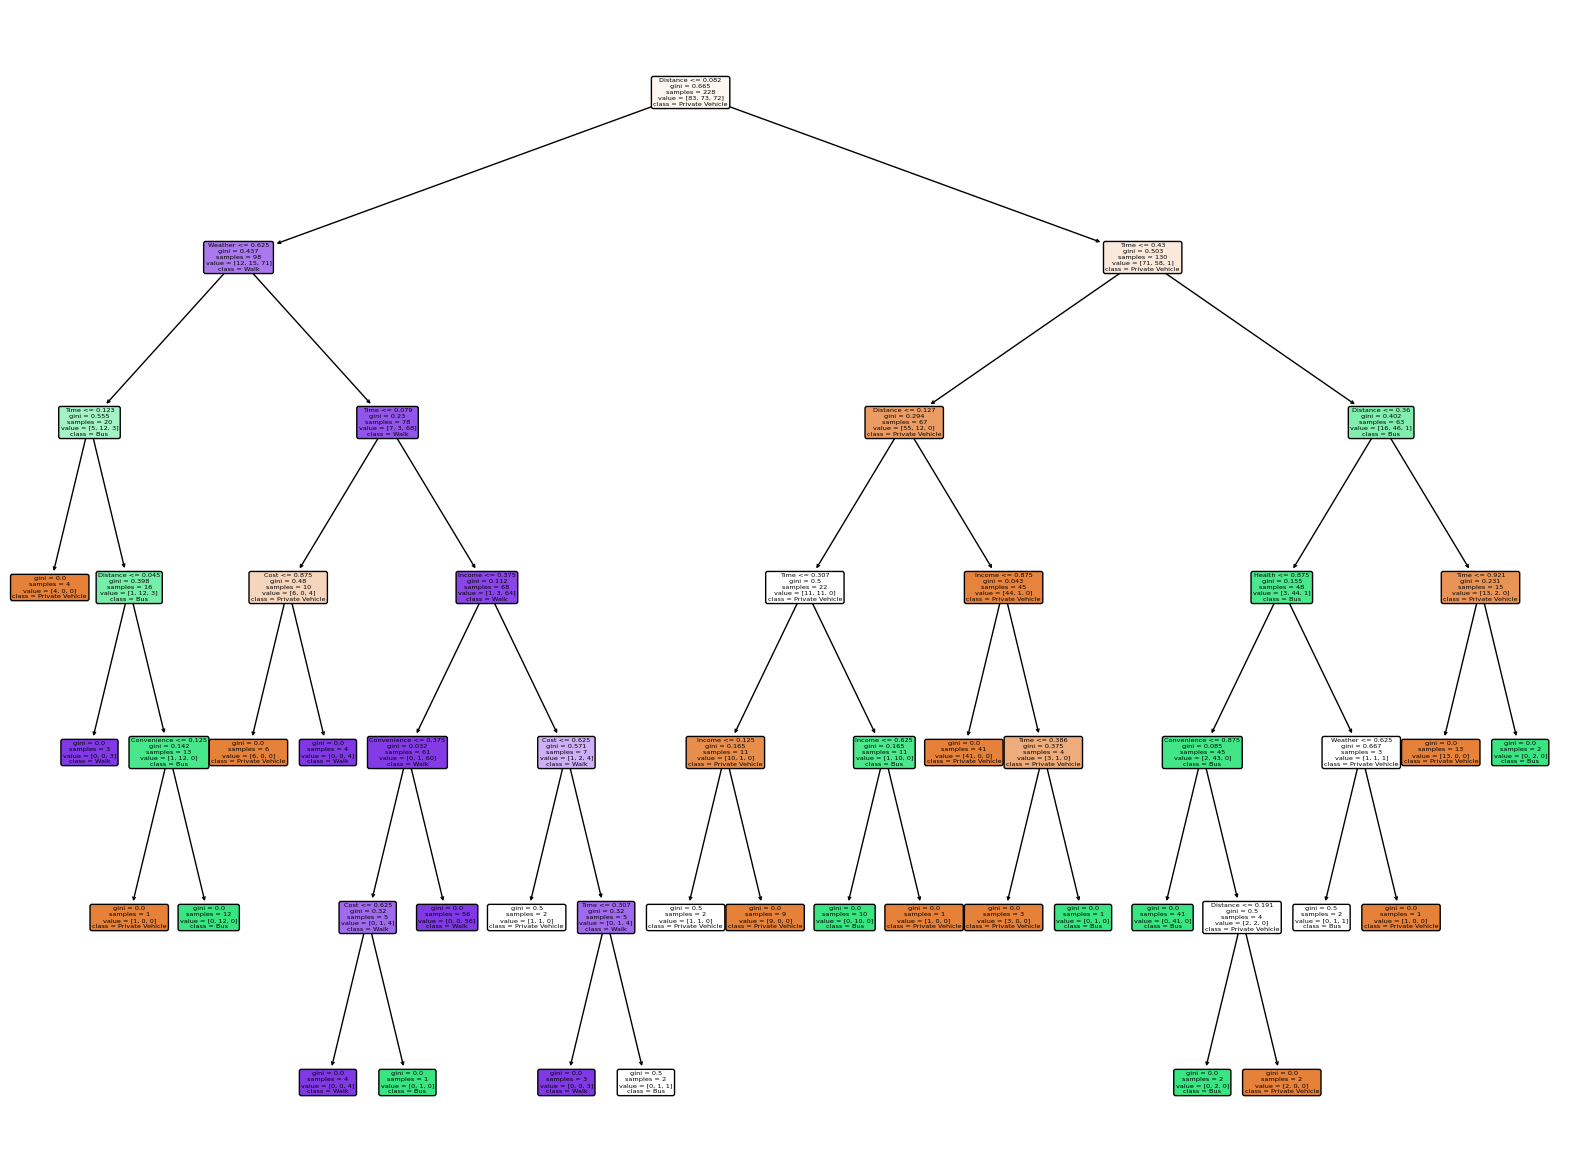

In [153]:
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=features, class_names=class_labels, rounded=True)
plt.show()

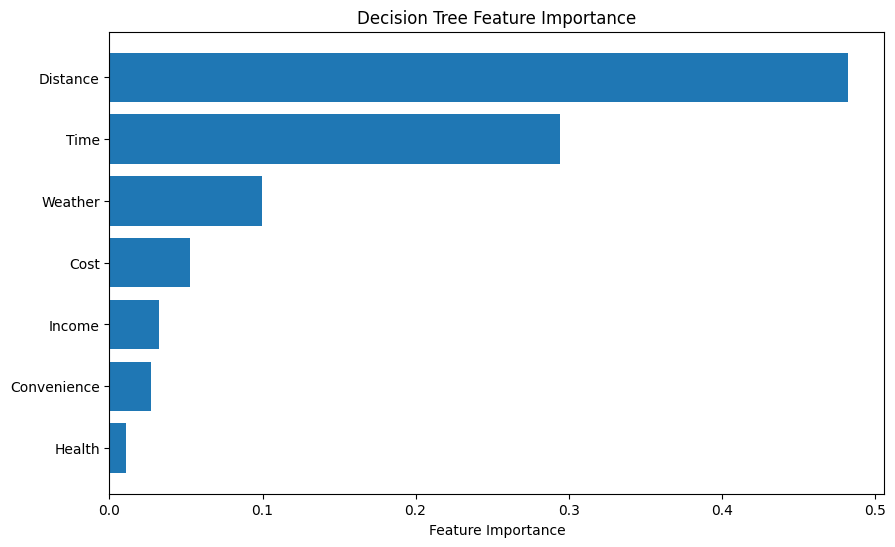

In [154]:
feature_importances = tree.feature_importances_



sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [41]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

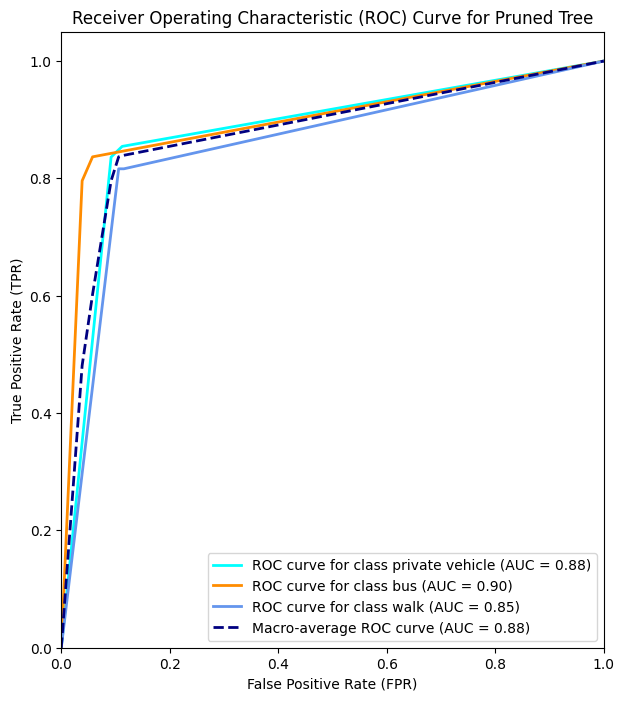

In [156]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Pruned Tree")

plt.show()

In [157]:
roc_auc["macro"]

0.8765448836877408

# Random Forest

In [70]:
X_train.shape, X_test.shape

((228, 7), (153, 7))

In [71]:
rf_model = RandomForestClassifier(random_state=1, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [26]:
oob_error = 1 - rf_model.oob_score_
print(f"Out-of-Bag Error: {oob_error:.4f}")

Out-of-Bag Error: 0.1053


In [163]:
param_grid = {
    'max_features': range(2, 8)
}

rf_model = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 6}


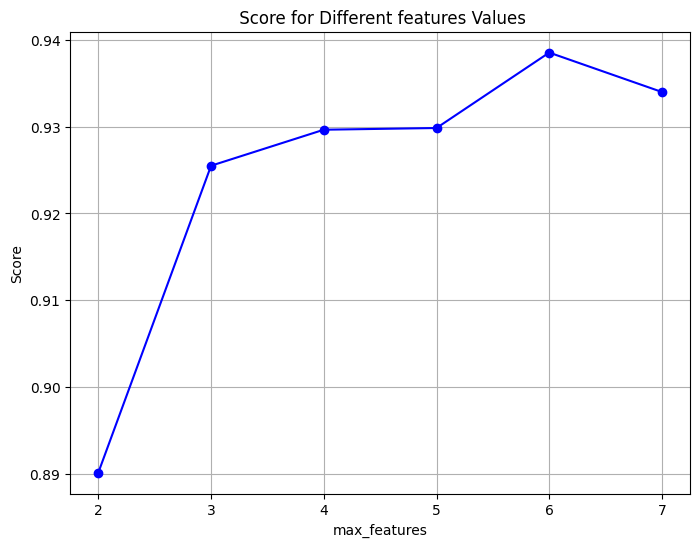

In [164]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [165]:
param_grid = {
    'n_estimators': list(range(50, 301))}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 55}


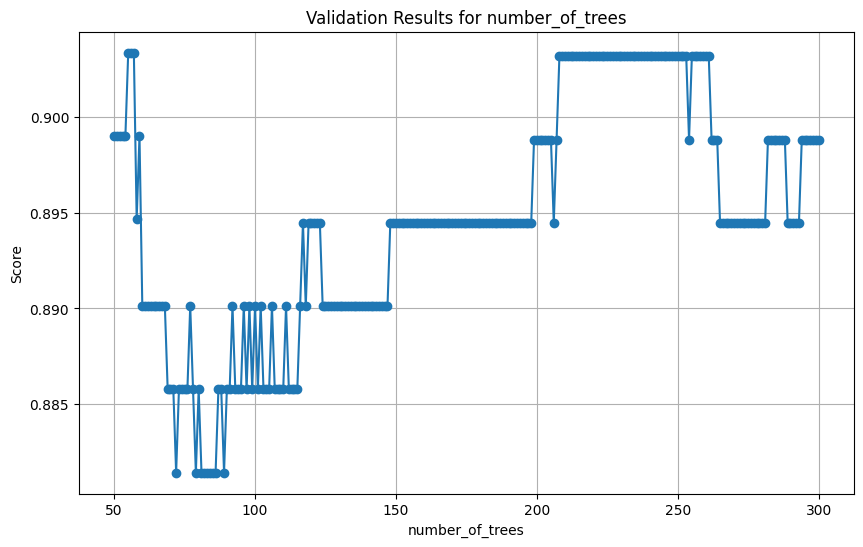

In [166]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

{'max_depth': 7}


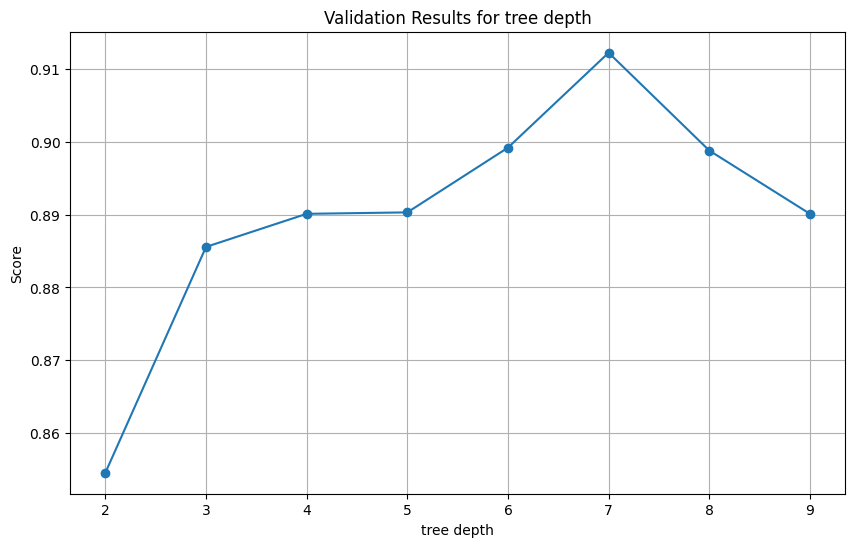

In [167]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.title('Validation Results for tree depth')
plt.grid(True)
plt.show()

In [72]:
 param_grid = {
    'n_estimators': list(range(50, 61)),
    'max_features': [6],
    'max_depth' : [7]}
rf_model = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_depth': 7, 'max_features': 6, 'n_estimators': 55}


In [73]:
score = grid_search.best_score_
score

0.934189723320158

In [75]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [76]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.98      0.92      0.95        49
           2       0.87      0.96      0.91        49

    accuracy                           0.93       153
   macro avg       0.94      0.93      0.93       153
weighted avg       0.94      0.93      0.94       153



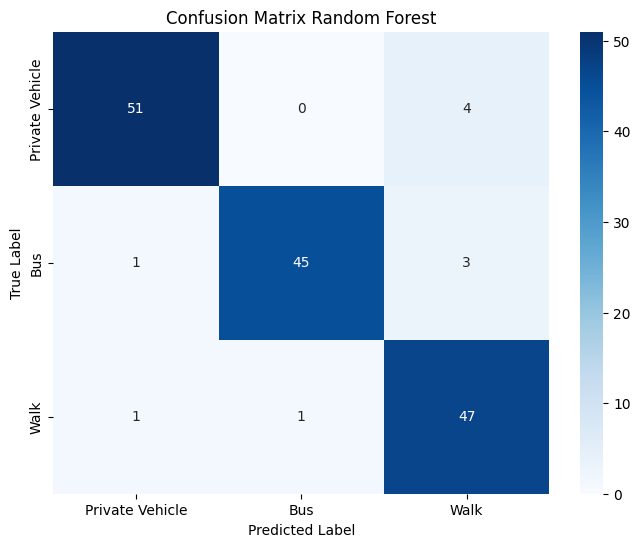

In [42]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

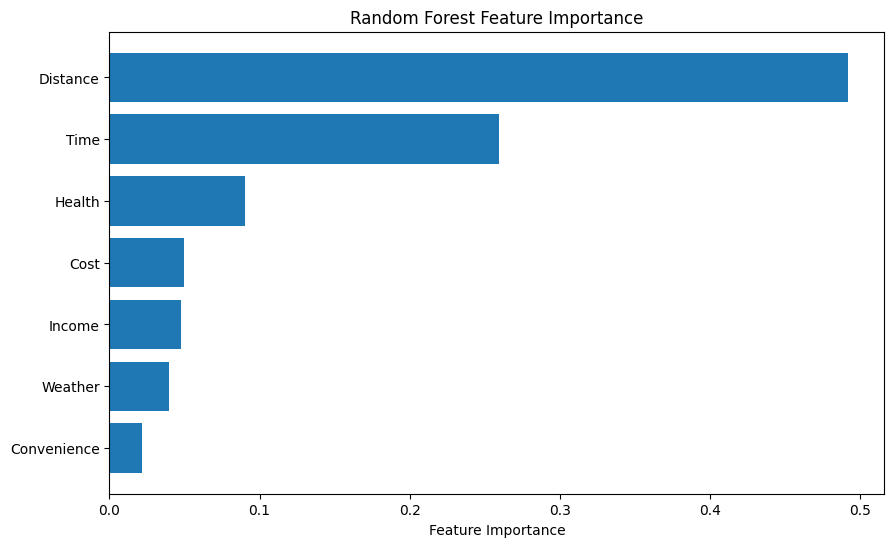

In [43]:
feature_importances = random_forest.feature_importances_



sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

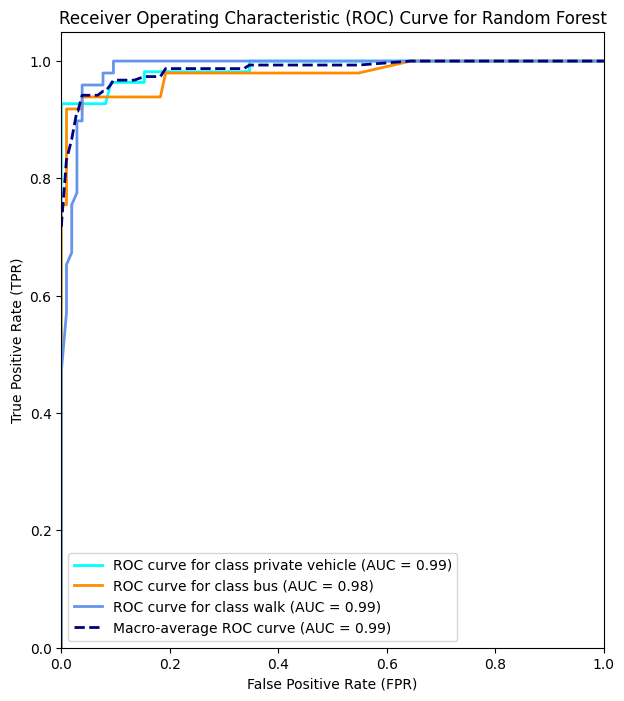

In [44]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [45]:
roc_auc['macro']

0.9851302366244057

In [46]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test)

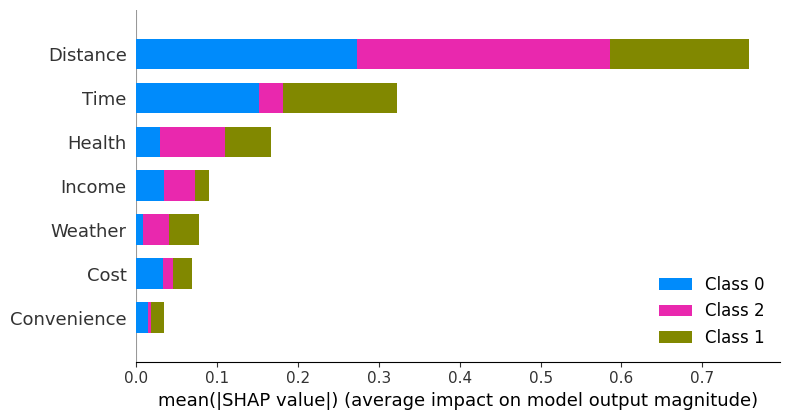

In [47]:
shap.summary_plot(shap_values, X_test)

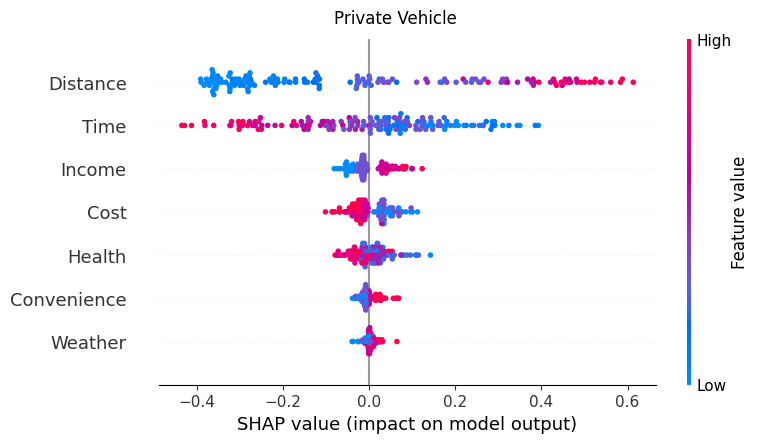

In [64]:
shap.summary_plot(shap_values[0], X_test, show=False)
plt.suptitle("Private Vehicle", y=1.02)
plt.show()

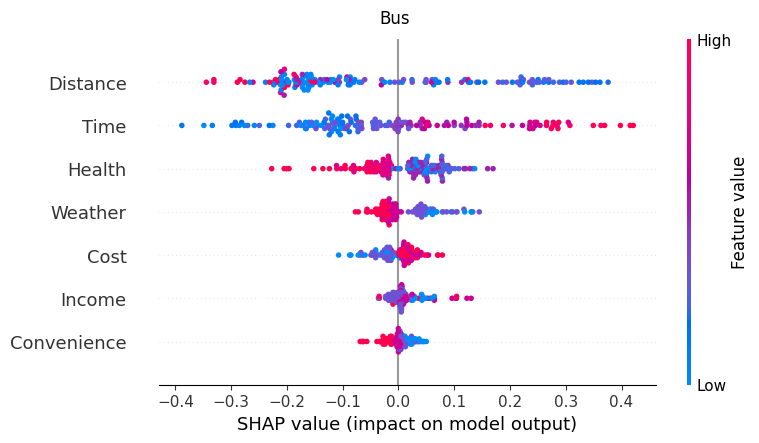

In [65]:
shap.summary_plot(shap_values[1], X_test, show=False)
plt.suptitle("Bus", y=1.02)
plt.show()

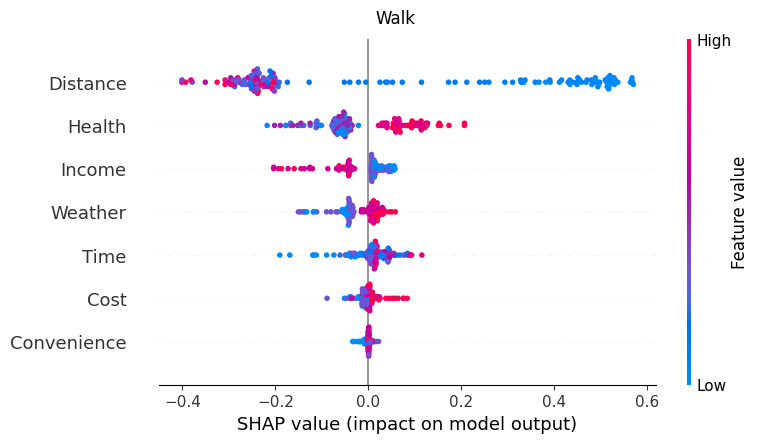

In [66]:
shap.summary_plot(shap_values[2], X_test, show=False)
plt.suptitle("Walk", y=1.02)
plt.show()

# XGBoost

In [48]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=1)

In [49]:
param_grid = {
    'n_estimators': list(range(50, 301)),
}

In [50]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [51]:
best_params

{'n_estimators': 102}

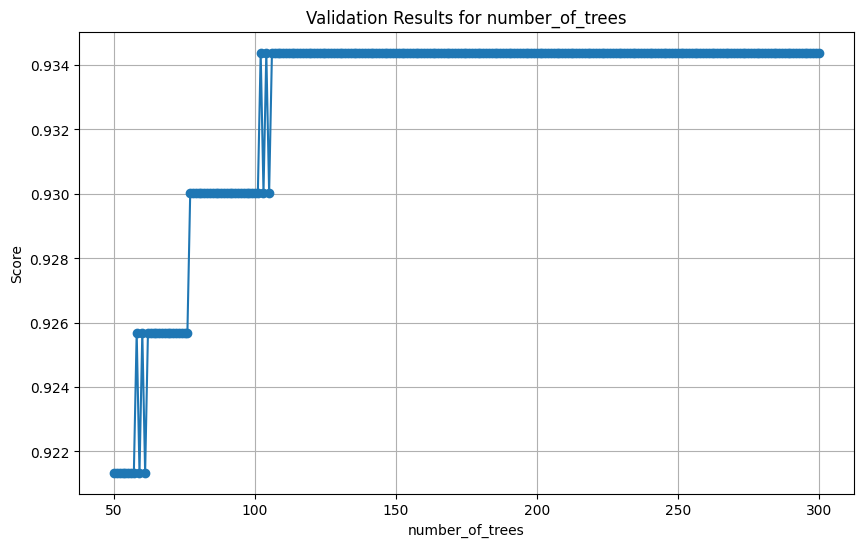

In [52]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [197]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [198]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

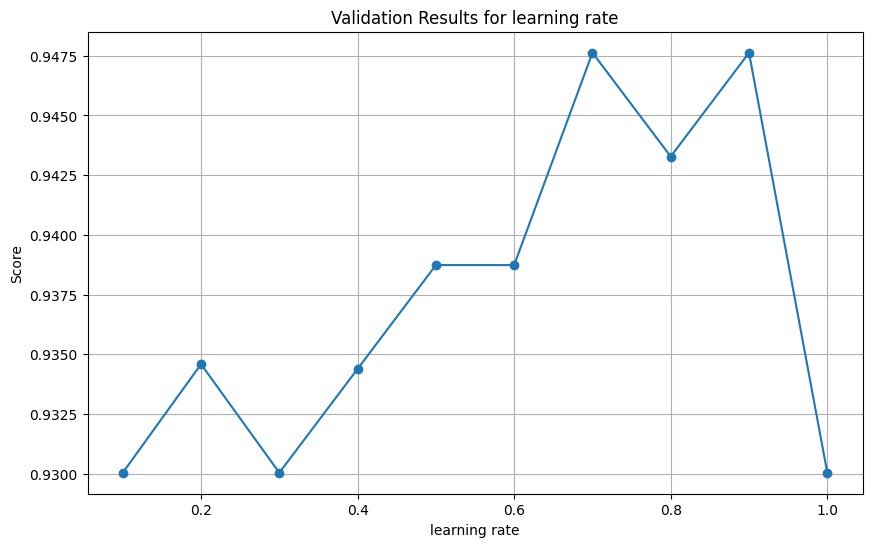

In [199]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

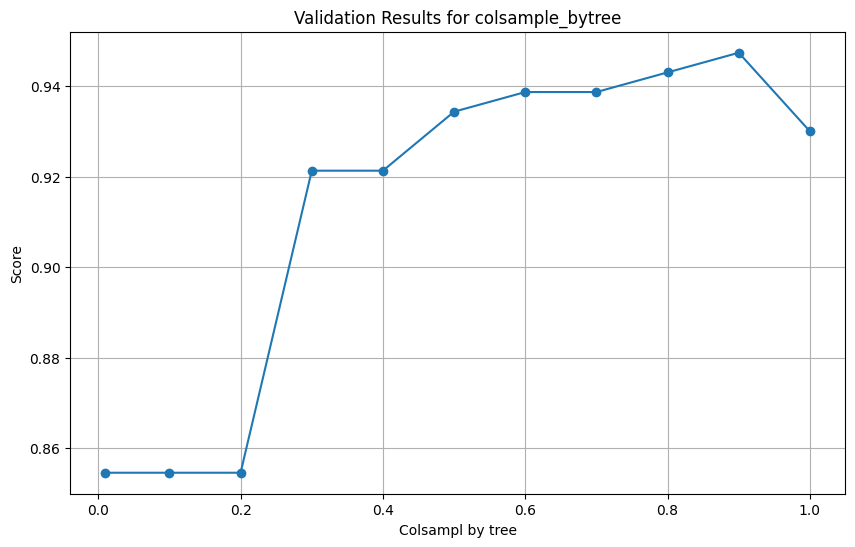

In [200]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

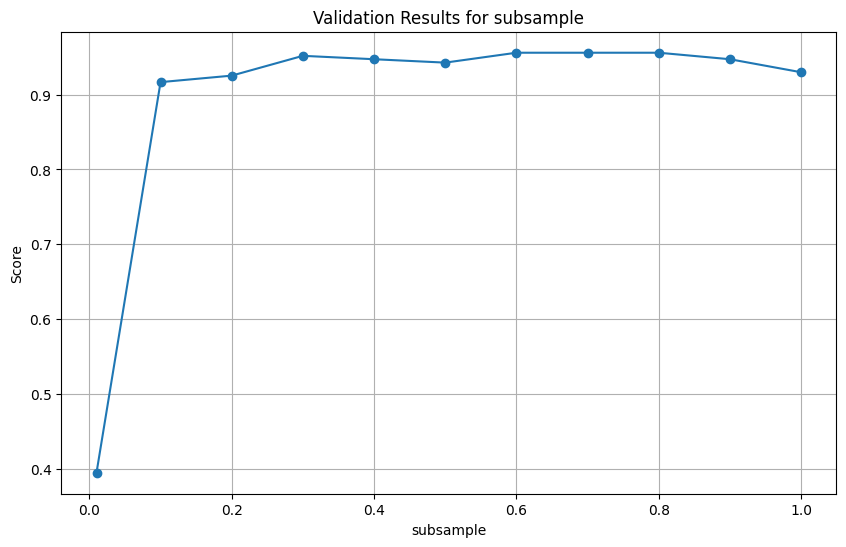

In [201]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

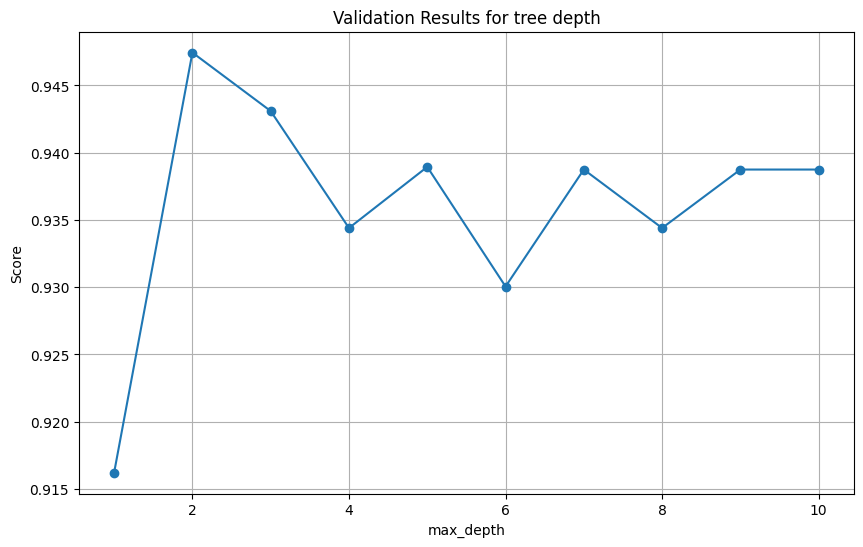

In [202]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Results for tree depth')
plt.grid(True)
plt.show()

In [53]:
param_grid = {
    'n_estimators': list(range(100, 151)),
    'subsample': [0.3],
    'colsample_bytree' : [0.9],
    'learning_rate': [0.2],
    'max_depth':[2]}

In [54]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3}


In [55]:
best_score = grid_search.best_score_
best_score

0.9472332015810275

In [60]:
best_model = grid_search.best_estimator_

In [61]:
results_df = pd.DataFrame(grid_search.cv_results_)
columns_to_display = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_df = results_df[columns_to_display]
print("Grid Search Results:")
print(results_df)

Grid Search Results:
                                               params  mean_test_score  \
0   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.947233   
1   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.947233   
2   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
3   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.938538   
4   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.938538   
5   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
6   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
7   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.938538   
8   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.938538   
9   {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
10  {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
11  {'colsample_bytree': 0.9, 'learning_rate': 0.2...         0.942885   
12  {'colsample_b

In [62]:
y_pred_test = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       1.00      0.99      0.99        73
           2       0.97      1.00      0.99        72

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228



In [63]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.96      0.92      0.94        49
           2       0.94      0.92      0.93        49

    accuracy                           0.94       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.94      0.94      0.94       153



In [64]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

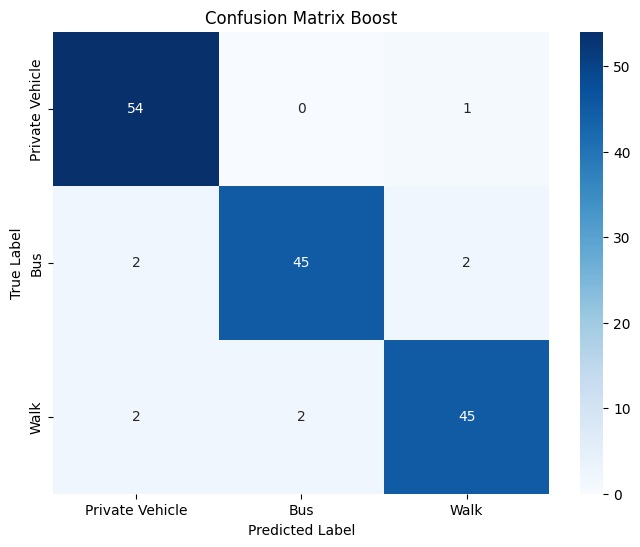

In [65]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

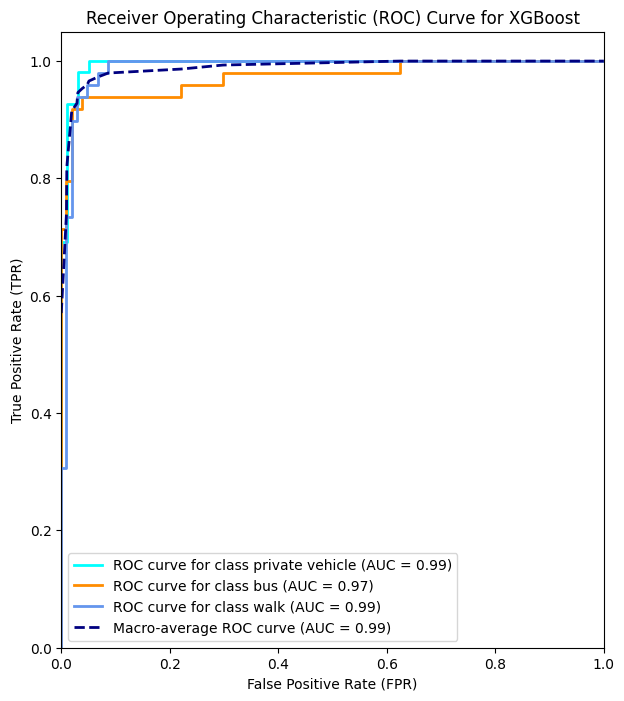

In [66]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [67]:
roc_auc['macro']

0.9884246220252052

In [68]:
X.columns

Index(['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance'],
      dtype='object')

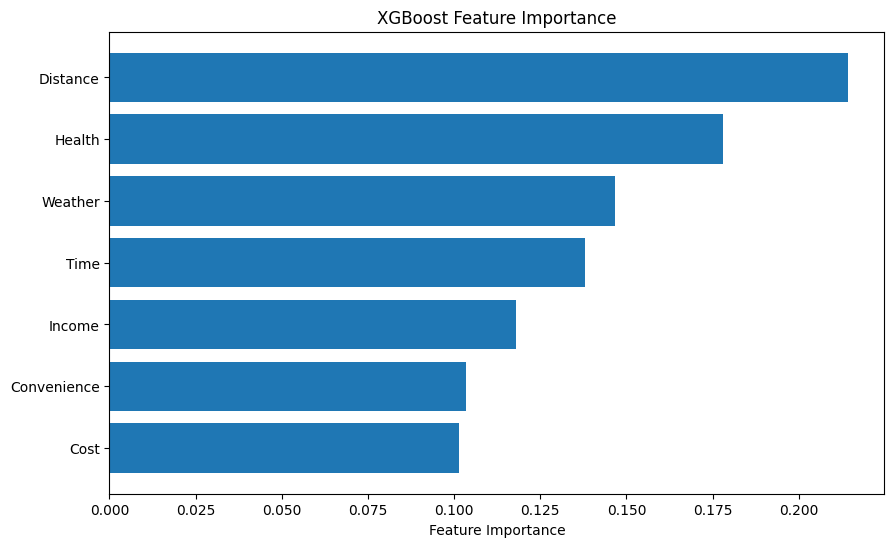

In [69]:
feature_importances = best_model.feature_importances_

feature_names = ['Income', 'Time', 'Convenience', 'Cost', 'Health', 'Weather',
       'Distance']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [42]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

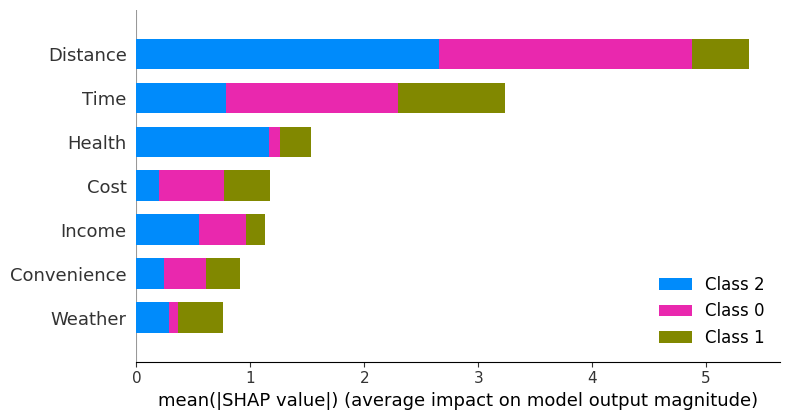

In [43]:
shap.summary_plot(shap_values, X_test)

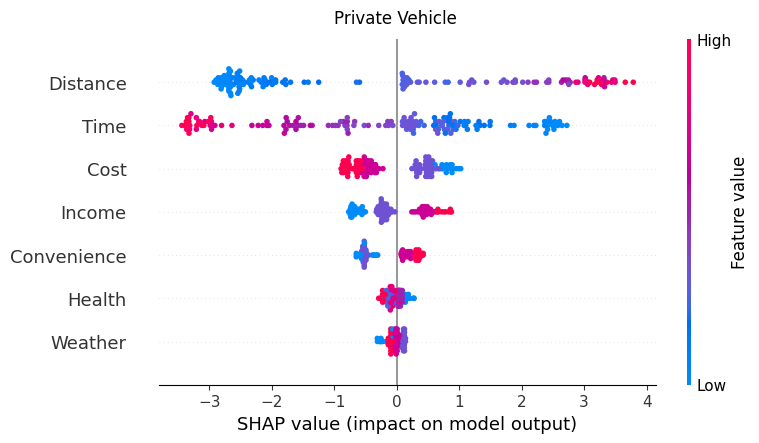

In [44]:
shap.summary_plot(shap_values[0], X_test, show=False)
plt.suptitle("Private Vehicle", y=1.02)
plt.show()

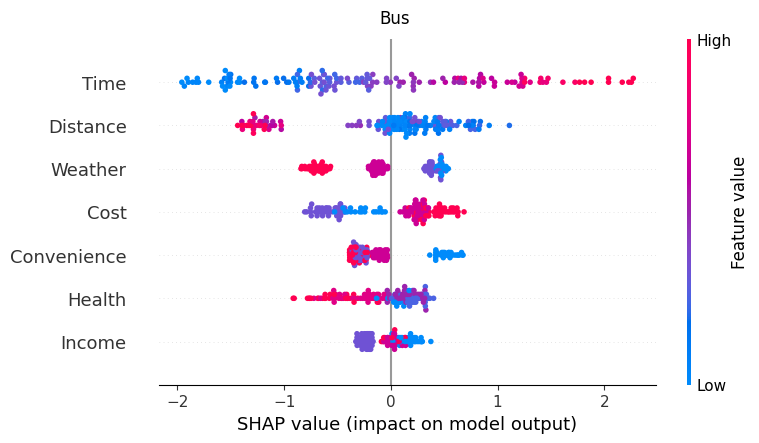

In [45]:
shap.summary_plot(shap_values[1], X_test, show=False)
plt.suptitle("Bus", y=1.02)
plt.show()

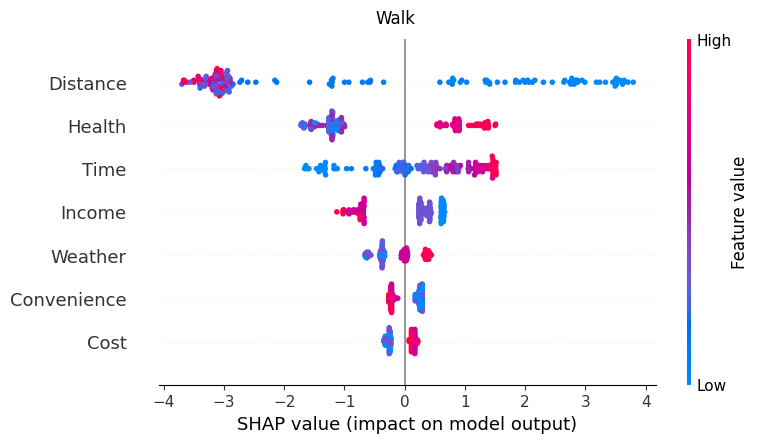

In [46]:
shap.summary_plot(shap_values[2], X_test, show=False)
plt.suptitle("Walk", y=1.02)
plt.show()

# Model Stack

In [274]:
base_classifier1 = RandomForestClassifier(random_state=1,n_jobs=-1)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
base_classifier3 = DecisionTreeClassifier(random_state=21)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=True,
    random_state=10
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.91      0.88      0.90        49
           2       0.93      0.88      0.91        49

    accuracy                           0.92       153
   macro avg       0.92      0.91      0.91       153
weighted avg       0.92      0.92      0.91       153



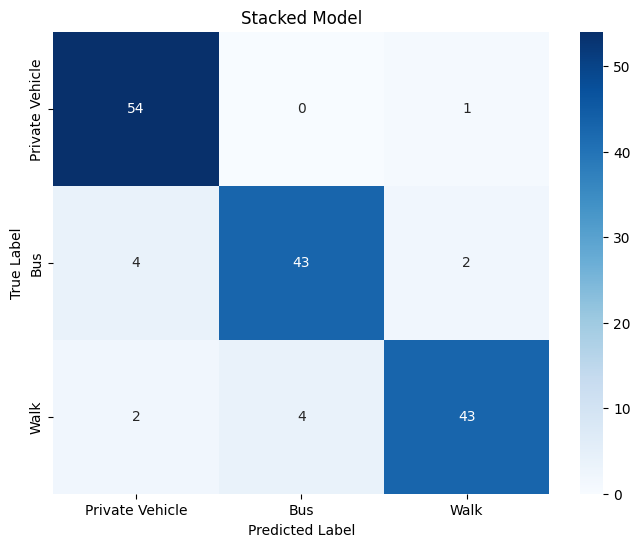

In [275]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [89]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

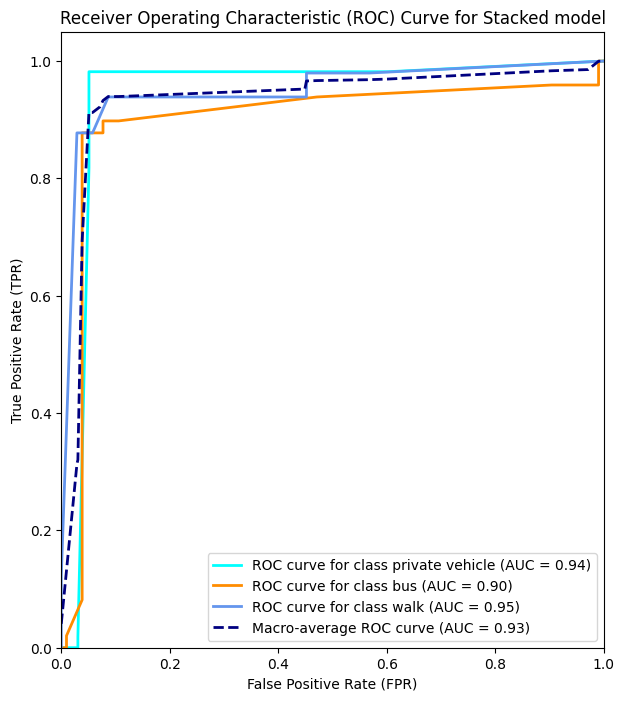

In [277]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [278]:
roc_auc["macro"]

0.9329427253989937

In [18]:
base_classifier1 = RandomForestClassifier(random_state=1,n_jobs=-1, max_depth=7, max_features=6, n_estimators=55)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=1,
    n_estimators=100,
    subsample=0.3,
    colsample_bytree=0.9,
    learning_rate=0.2,
    max_depth=2)
base_classifier3 = DecisionTreeClassifier(random_state=21, max_depth=6, min_samples_leaf = 1, min_samples_split= 3)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=True,
    random_state=10
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.86      0.90      0.88        49
           2       0.94      0.94      0.94        49

    accuracy                           0.92       153
   macro avg       0.91      0.92      0.91       153
weighted avg       0.92      0.92      0.92       153



In [19]:
meta_model_coefs = stacking_classifier.meta_clf_.coef_
print("Meta Model Coefficients:", meta_model_coefs)

Meta Model Coefficients: [[-1.59324509 -1.8022554  -0.59002758]
 [ 0.04109712  0.19961423 -0.22559136]
 [ 2.06690329  1.77679227  0.49691393]]


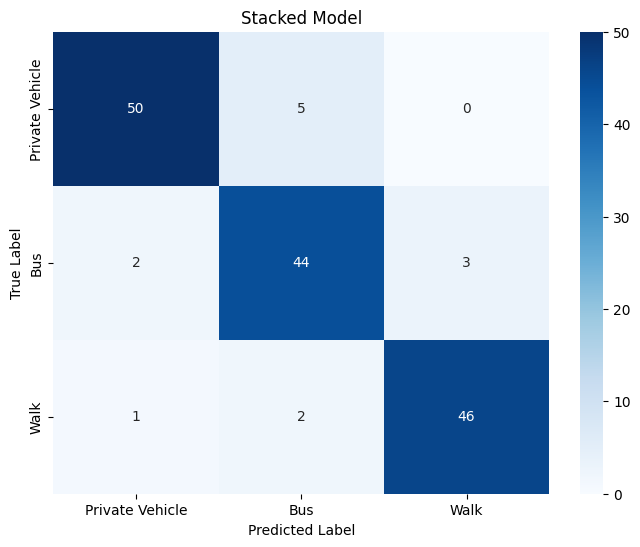

In [20]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

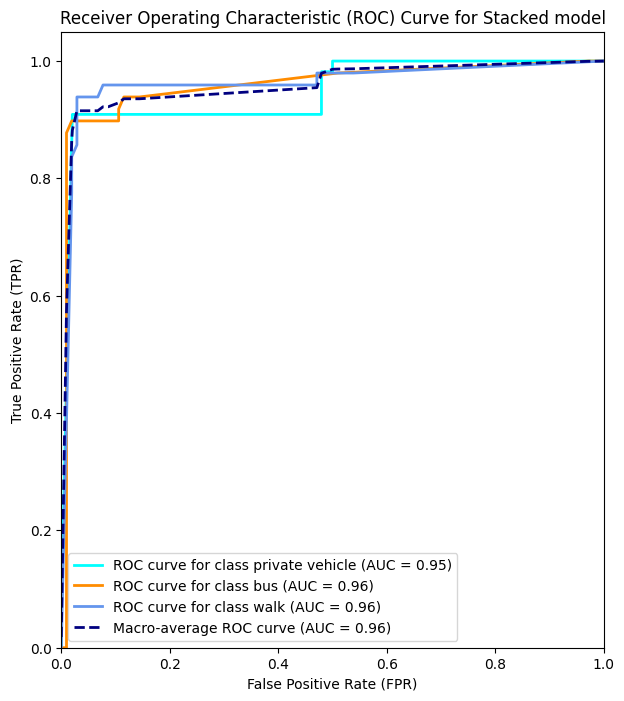

In [90]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [91]:
roc_auc["macro"]

0.9587751898247526